<a href="https://colab.research.google.com/github/mjvakili/MLcourse/blob/master/day5/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In principal component analysis (PCA), the data is projected onto a lower dimensional ***linear*** space in which the data has the highest variance. 

Let's consider a $N\times D$ matrix $X$. Every row of these matrix $x_n \in R^{D}, \; n \in \{1,...,N\}$ is a matrix in $D$-dimensional Euclean Space. 

The covariance matrix of the vectors $\{x_n\}_{n=1}^{N}$ can be obtained in the following way

$S = \frac{1}{N} \sum_{n=1}^{N}\big(x_n - \bar{x}\big)^{T}\big(x_n - x\big)$, where $\bar{x} \in R^{D}$ is the mean data vector given by

$\bar{x} = \frac{1}{N} \sum_{n=1}^{N} x_n$.

Principal components of the dataset $X_{N \times M}$ are a set of orthonormal unit vectors $u_1, u_2, ...$ that satisfy the following condition:

$Su_i = \lambda_i u_i$

In other words, the vector $u_i$ is the eigen vector of $S$ associated with the eigen value $\lambda_i$. The principal components are the eigen vectors of $S$ sorted by their correponding eigenvalues $\lambda_i$. The first principal component $u_1$ is the eigenvector associated with the largest eigenvalues, and $u_2$ is associated with the second largest eigen value, and so on. 

So the direction of the unit vector $u_1$ corresponds to the direction of the largest variance in the data, and so on.

By projecting the individual data vectors $x_n \in R^{D}$ onto a lower $M$-dimensional space spanned by the principal components $u_1, u_2, ..., u_M$ with the largest eigen values of $S$ (with the largest variance) one can reduce the dimensionality of the data such that a large fraction of the data is captured by this $M$-dimensional linear manifold.

For a more in depth description of the mathematical background of PCA, please refer to chapter 12 of [Machine learning and Pattern Recognition by Bishop](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
#matplotlib plotting settings
import matplotlib
matplotlib.rcParams['xtick.major.size'] = 7
matplotlib.rcParams['xtick.labelsize'] = 'x-large'
matplotlib.rcParams['ytick.major.size'] = 7
matplotlib.rcParams['ytick.labelsize'] = 'x-large'
matplotlib.rcParams['xtick.top'] = False
matplotlib.rcParams['ytick.right'] = False
matplotlib.rcParams['ytick.direction'] = 'in'
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = [7,7]

In [0]:
def transformer(X):
    '''
    linearly transforms the data to the basis 
    in which the covariance matrix S = X^TX is diagonal
    The order of the axes in this basis is the order of 
    eigen values of S.

    Input: X: NxD matrix
    Output: X_transformed NxD matrix
    '''    
    Mean = np.mean(X.T, axis = 1) 
    #subtract X by its mean along each direction
    X_zero = X - Mean
    #compute the covariance matrix
    S = np.cov(X_zero.T)
    #return the ordered list of eigvals, eigvecs
    eigvals, eigvecs = np.linalg.eig(S)
    #the eigenvecs returned by np.linalg.eig should be transposed
    eigvecs = eigvecs.T
    #sorting the eigen values from large to small
    sorted_index = np.argsort(eigvals, kind = 'stable')[::-1]
    eigvals, eigvecs = eigvals[sorted_index], eigvecs[sorted_index]
    #apply the linear transformation
    X_transform = eigvecs.dot(X_zero.T)
    X_transform = X_transform.T
    
    return X_transform, Mean, S, eigvals/np.sum(eigvals), eigvecs  

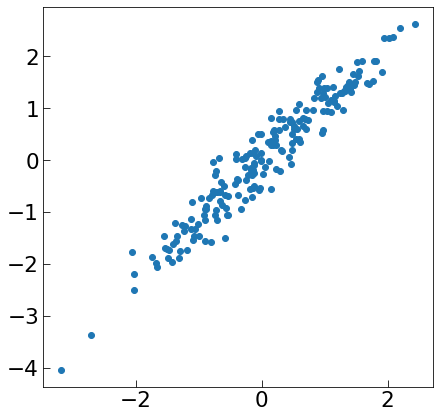

In [4]:
rng = np.random.RandomState(20)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:,0], X[:,1])
#X = np.random.multivariate_normal(mean = [0,0,0], cov =np.array([[1, 0, 0],[0, 2, 0], [0,0,0.5#]]), size = 400)

In [0]:
X_transform, Mean, S, eigval, eigvec = transformer(X)

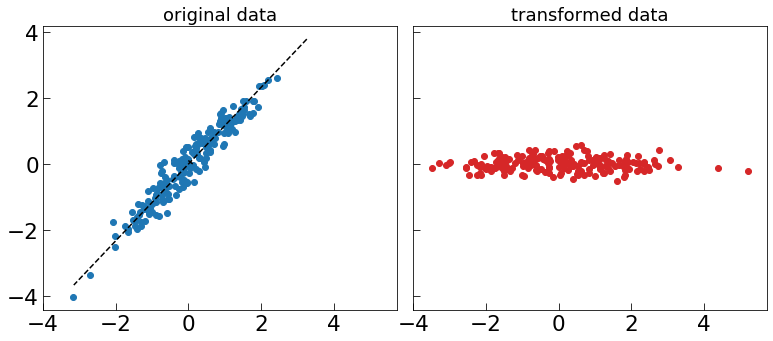

In [6]:
fig, axs = plt.subplots(nrows = 1, ncols =2, sharex = True, sharey = True, figsize = (11, 5))
axs[0].scatter(X[:,0], X[:,1], color = "C0")

for i in range(len(eigvec)): 
  axs[0].plot([Mean[0] - 5*eigval[i]*eigvec[i][0], Mean[0] + 5*eigval[i]*eigvec[i][0]], 
              [Mean[1] - 5*eigval[i]*eigvec[i][1], Mean[1] + 5*eigval[i]*eigvec[i][1]], 
              color = "k", linestyle = "dashed")
axs[0].set_title("original data")
axs[1].scatter(X_transform[:,0], X_transform[:,1], color = "C3")
axs[1].set_title("transformed data")
plt.tight_layout()

Now let's load the MNIST dataset:

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [8]:
print("shape of the training image data= ", x_train.shape)

shape of the training image data=  (60000, 28, 28)


In [0]:
nsample, nh, nw = x_train.shape
x_train = x_train.reshape(nsample, nh*nw)

In [0]:
def image_preprocess(X):
  '''
  preprocess the image
  input NxD matrix
  output NxD matrix with zero mean and std of unity 
  '''
  Sigma = np.std(X, axis = 0)
  Sigma[Sigma == 0] = 1.
  Mean = np.mean(X, axis = 0)
  X = (X - Mean)/Sigma

  return X  

In [0]:
x_scaled = image_preprocess(x_train)

In [0]:
X_transform, Mean, S, eigval, eigvec = transformer(x_new)

In [0]:
pca = X_transform[:, :2]

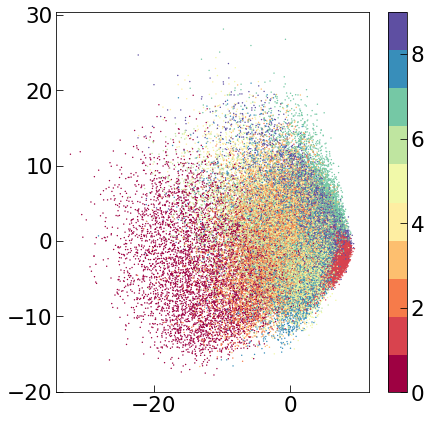

In [57]:
plt.scatter(pca[:,0], pca[:,1], 
            edgecolor='none', alpha=1,
            cmap=plt.cm.get_cmap('Spectral', 10),
            c = y_train, s = 2)
plt.colorbar()

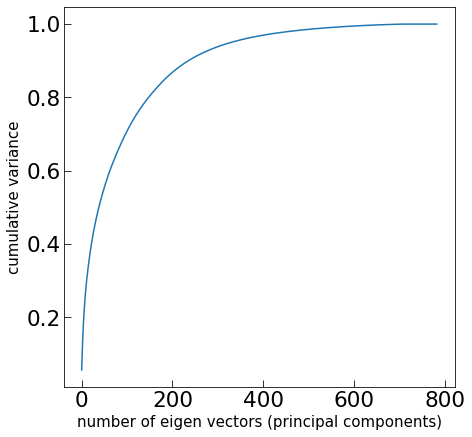

In [58]:
plt.plot(np.cumsum(eigval))
plt.xlabel('number of eigen vectors (principal components)')
plt.ylabel('cumulative variance');

Now let's look at a much simpler dataset: [UCI Handwritten digits](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits). Each instance in this data is an 8$\times$8 image of a handwritten digit.



In [60]:
from sklearn.datasets import load_digits
digits = load_digits()
print("the shape of the data = ", digits.data.shape)

the shape of the data =  (1797, 64)


In [0]:
digits_scaled = image_preprocess(digits.data)

In [0]:
X_transform, Mean, S, eigval, eigvec = transformer(digits.data)

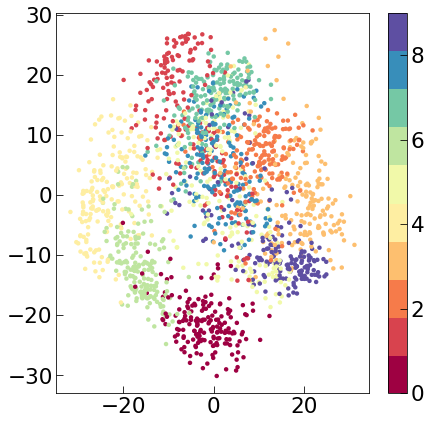

In [63]:
pca = X_transform[:, :2] #keep the first two components
plt.scatter(pca[:,0], pca[:,1], 
            edgecolor='none', alpha=1,
            cmap=plt.cm.get_cmap('Spectral', 10),
            c = digits.target, s = 20)
plt.colorbar()

We notice that this data is much simpler and therefore allows for a better separation of labels in the two-dimensional linear plane embeded in th 64 dimensional space.

#Comparison of our results with `scikit-learn`

Following the math behind PCA, we have coded up a simple PCA algorithm. Let's compare our results with the PCA functionality of scikit-learn.



(1797, 64)
(1797, 2)


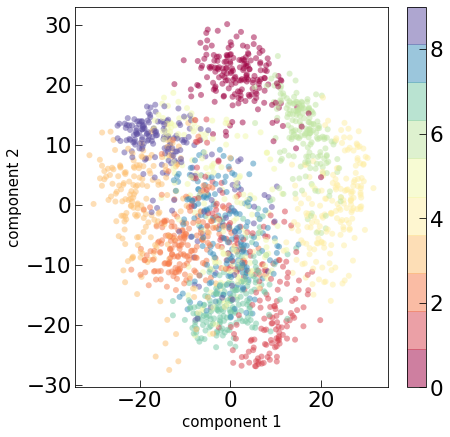

In [64]:
from sklearn.decomposition import PCA
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

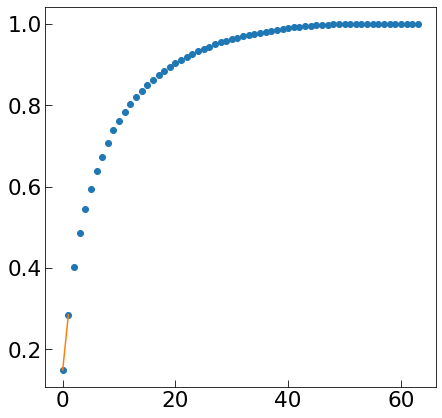

In [65]:
plt.plot(np.cumsum(eigval), "o")
plt.plot(np.cumsum(pca.explained_variance_ratio_))